In [ ]:
!pip install river


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 27.2 MB/s 


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from river import stream
from datetime import datetime

In [ ]:
#connnecting drive with google colab
from google.colab import drive
drive.mount('/content/drive/')
#read the csv file
df_reliance=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Final_csv/RELIANCE.csv')
df_hdfc=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Final_csv/HDFC.csv')
df_tcs=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Final_csv/TCS.csv')
df_HDFCBANK=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Final_csv/HDFCBANK.csv')
df_LT=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Final_csv/LT.csv')
df_INFY=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Final_csv/INFY.csv')
df_KOTAKBANK=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Final_csv/KOTAKBANK.csv')
df_ITC=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Final_csv/ITC.csv')
df_SBIN=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Final_csv/SBIN.csv')
df_ICICIBANK=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Final_csv/ICICIBANK.csv')


Mounted at /content/drive/


In [ ]:
df_reliance.sort_values(by=["Datetime"], inplace=True, ascending=True)
df_hdfc.sort_values(by=["Datetime"], inplace=True, ascending=True)
df_tcs.sort_values(by=["Datetime"], inplace=True, ascending=True)
df_LT.sort_values(by=["Datetime"], inplace=True, ascending=True)
df_HDFCBANK.sort_values(by=["Datetime"], inplace=True, ascending=True)
df_INFY.sort_values(by=["Datetime"], inplace=True, ascending=True)
df_KOTAKBANK.sort_values(by=["Datetime"], inplace=True, ascending=True)
df_ITC.sort_values(by=["Datetime"], inplace=True, ascending=True)
df_SBIN.sort_values(by=["Datetime"], inplace=True, ascending=True)
df_ICICIBANK.sort_values(by=["Datetime"], inplace=True, ascending=True)


In [ ]:
df_reliance.drop_duplicates(keep='first',inplace=True)
df_hdfc.drop_duplicates(keep='first',inplace=True)
df_tcs.drop_duplicates(keep='first',inplace=True)
df_HDFCBANK.drop_duplicates(keep='first',inplace=True)
df_LT.drop_duplicates(keep='first',inplace=True)
df_INFY.drop_duplicates(keep='first',inplace=True)
df_KOTAKBANK.drop_duplicates(keep='first',inplace=True)
df_ITC.drop_duplicates(keep='first',inplace=True)
df_SBIN.drop_duplicates(keep='first',inplace=True)
df_ICICIBANK.drop_duplicates(keep='first',inplace=True)

In [ ]:
# Combine all the dataFrames into a single one
df_complete = pd.concat([df_reliance ,df_hdfc,df_tcs,df_HDFCBANK,df_LT,df_INFY,df_KOTAKBANK,df_ITC,df_SBIN,df_ICICIBANK])

# View the shape
df_complete.shape

(64040, 7)

In [ ]:
df_complete

,Datetime,Open,High,Low,Close,Volume,Trading_code
0,2021-04-26 09:15:00+05:30,1920.000000,1930.000000,1912.000000,1926.850000,1061804,RELIANCE
1,2021-04-26 09:30:00+05:30,1927.000000,1936.100000,1925.050000,1935.050000,652372,RELIANCE
2,2021-04-26 09:45:00+05:30,1935.200000,1949.750000,1935.050000,1949.250000,707257,RELIANCE
3,2021-04-26 10:00:00+05:30,1949.150000,1961.600000,1949.100000,1955.000000,915519,RELIANCE
4,2021-04-26 10:15:00+05:30,1955.050000,1958.200000,1947.600000,1950.950000,609119,RELIANCE
...,...,...,...,...,...,...,...
6399,2022-05-06 14:15:00+05:30,721.549988,721.750000,717.000000,717.000000,450609,ICICIBANK
6400,2022-05-06 14:30:00+05:30,717.099976,718.450012,716.299988,717.099976,383262,ICICIBANK
6401,2022-05-06 14:45:00+05:30,717.049988,718.250000,715.549988,717.599976,486507,ICICIBANK
6402,2022-05-06 15:00:00+05:30,717.650024,719.549988,716.799988,719.400024,894179,ICICIBANK


In [ ]:
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64040 entries, 0 to 6403
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Datetime      64040 non-null  object 
 1   Open          64040 non-null  float64
 2   High          64040 non-null  float64
 3   Low           64040 non-null  float64
 4   Close         64040 non-null  float64
 5   Volume        64040 non-null  int64  
 6   Trading_code  64040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 3.9+ MB


In [ ]:
df_complete.head()

,Datetime,Open,High,Low,Close,Volume,Trading_code
0,2021-04-26 09:15:00+05:30,1920.00,1930.00,1912.00,1926.85,1061804,RELIANCE
1,2021-04-26 09:30:00+05:30,1927.00,1936.10,1925.05,1935.05,652372,RELIANCE
2,2021-04-26 09:45:00+05:30,1935.20,1949.75,1935.05,1949.25,707257,RELIANCE
3,2021-04-26 10:00:00+05:30,1949.15,1961.60,1949.10,1955.00,915519,RELIANCE
4,2021-04-26 10:15:00+05:30,1955.05,1958.20,1947.60,1950.95,609119,RELIANCE


In [ ]:
df_ITC.shape

(6404, 7)

In [ ]:
df_complete.sort_values(by=["Datetime"], inplace=True, ascending=True)
df_complete.drop_duplicates(keep=False,inplace=True)

In [ ]:
print(type(df_complete))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
df_complete.Trading_code.value_counts()

RELIANCE     6404
HDFCBANK     6404
HDFC         6404
LT           6404
ICICIBANK    6404
KOTAKBANK    6404
ITC          6404
SBIN         6404
INFY         6404
TCS          6404
Name: Trading_code, dtype: int64

In [ ]:
# Create distinct dataFrame for each of 
df_reliance = df_complete[df_complete.Trading_code == "RELIANCE"]
df_hdfc = df_complete[df_complete.Trading_code == "HDFC"]
df_tcs = df_complete[df_complete.Trading_code == "TCS"]
df_LT = df_complete[df_complete.Trading_code == "LT"]
df_HDFCBANK = df_complete[df_complete.Trading_code == "HDFCBANK"]
df_INFY = df_complete[df_complete.Trading_code == "INFY"]
df_KOTAKBANK = df_complete[df_complete.Trading_code == "KOTAKBANK"]
df_ITC = df_complete[df_complete.Trading_code == "ITC"]
df_SBIN = df_complete[df_complete.Trading_code == "SBIN"]
df_ICICIBANK = df_complete[df_complete.Trading_code == "ICICIBANK"]

In [ ]:
# Discard unnecessary column
df_reliance = df_reliance .drop("Trading_code", axis=1)
df_hdfc = df_hdfc.drop("Trading_code", axis=1)
df_tcs = df_tcs.drop("Trading_code", axis=1)
df_LT = df_LT .drop("Trading_code", axis=1)
df_HDFCBANK = df_HDFCBANK.drop("Trading_code", axis=1)
df_INFY = df_INFY.drop("Trading_code", axis=1)
df_KOTAKBANK = df_KOTAKBANK.drop("Trading_code", axis=1)
df_ITC = df_ITC.drop("Trading_code", axis=1)
df_SBIN = df_SBIN.drop("Trading_code", axis=1)
df_ICICIBANK = df_ICICIBANK.drop("Trading_code", axis=1)


In [ ]:
# Sort the samples by ascending order of date
df_reliance.sort_values(by=["Datetime"], inplace=True, ascending=True)
df_hdfc.sort_values(by=["Datetime"], inplace=True, ascending=True)
df_tcs.sort_values(by=["Datetime"], inplace=True, ascending=True)
df_LT.sort_values(by=["Datetime"], inplace=True, ascending=True)
df_HDFCBANK.sort_values(by=["Datetime"], inplace=True, ascending=True)
df_INFY.sort_values(by=["Datetime"], inplace=True, ascending=True)
df_KOTAKBANK.sort_values(by=["Datetime"], inplace=True, ascending=True)
df_ITC.sort_values(by=["Datetime"], inplace=True, ascending=True)
df_SBIN.sort_values(by=["Datetime"], inplace=True, ascending=True)
df_ICICIBANK.sort_values(by=["Datetime"], inplace=True, ascending=True)

[Text(0, 0.5, 'Closing Price'),
 Text(0.5, 0, 'Date'),
 Text(0.5, 1.0, 'Reliance')]

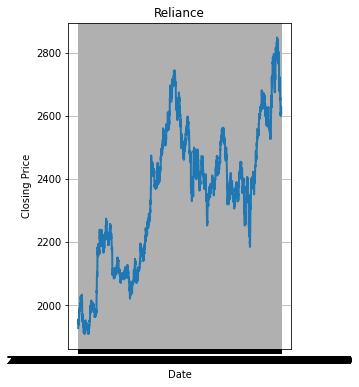

In [ ]:
# Plot closing_price with respect to date
fig, (ax0) = plt.subplots(nrows=1, ncols=1, figsize=(4,6))

# Add data for ax0
ax0.plot(df_reliance.Datetime, df_reliance.Close, lw=2, alpha=1)
# Customize ax0
ax0.grid(alpha=0.95)
ax0.set(title="Reliance",
        xlabel="Date",
        ylabel="Closing Price")


In [ ]:
def calculate_ema(prices, days, smoothing=2):
    
    ema = [sum(prices[:days]) / days]
    for price in prices[days:]:
        ema.append((price * (smoothing / (1 + days))) + ema[-1] * (1 - (smoothing / (1 + days))))
    return ema


In [ ]:
def print_ema(df,t):
  
 
  ema_X = np.arange(df.shape[0])      # Creates array [10, 11, 12, 13, ..., df.shape[0]+1]
                                      # We start at 10, because we use the first 10 values to calculate the SMA,
                                      # then we calculate EMA form the 11th value

  plt.figure(figsize=(10,7))
  plt.title(t)
  plt.xlabel('Days')
  plt.ylabel('Price')
  plt.plot(df['Close'], label='Closing Prices')#price_X, 
  plt.plot( df['vwap'], label='VWAP')#ema_X,
  
  plt.plot( df['ema'], label='EMA')#ema_X,
  
  plt.plot()
  
  plt.show()

In [ ]:
def vwap(df):
  vwap=[]
  for ind in df.index:
    vwap.append( float(df['High'][ind]+df['Low'][ind]+df['Close'][ind])*df['Volume'][ind]/((df['Volume'][ind].cumsum())*3)[0])
    #print (vwap)
  return vwap
  

In [ ]:
def nextclose (df):
  next=[]
  for ind in df.index:
    if(ind>=1):
      #next.append(df['Close'][ind])
      df['next_close'][ind-1]=float(df['Close'][ind])
  #print(next)
  #return next
  

In [ ]:
def calc(df,x):
  df['ema']=np.nan
  ema= calculate_ema(df['Close'], 10)
  df['ema'].iloc[9:9+len(ema)] = ema
  df['vwap']=vwap(df)
  #df=df.dropna()
  df['next_close']=0.0
  #df['next_close']=nextclose(df)
  nextclose(df)
  print_ema(df,x)


In [ ]:
calc(df_reliance,"Reliance")
df_reliance=df_reliance.dropna()
calc(df_hdfc,"HDFC")
df_hdfc=df_hdfc.dropna()
calc(df_tcs,"TCS")
df_tcs=df_tcs.dropna()
calc(df_HDFCBANK,"HDFCBANK")
df_HDFCBANK=df_HDFCBANK.dropna()
calc(df_LT,"LT")
df_LT=df_LT.dropna()
calc(df_INFY,"INFY")
df_INFY=df_INFY.dropna()
calc(df_KOTAKBANK,"KOTAKBANK")
df_KOTAKBANK=df_KOTAKBANK.dropna()
calc(df_ITC,"ITC")
df_ITC=df_ITC.dropna()
calc(df_SBIN,"SBIN")
df_SBIN=df_SBIN.dropna()
calc(df_ICICIBANK,"ICICIBANK")
df_ICICIBANK=df_ICICIBANK.dropna()

In [ ]:
df_reliance.info()

In [ ]:
df_hdfc.info()

In [ ]:
# calculate the Pearson's correlation between two variables (check it just based on the data of dhaka bank)
from scipy.stats import pearsonr

# list down the features
features = ["Open",	"High",	"Low",	"Close",	"Volume", "ema", "vwap"	]

# take each feature and calculate Pearson's correlation
for feature in features:
    # get data
    data1 = df_reliance[feature]
    data2 = df_reliance["next_close"]
    # calculate Pearson's correlation
    corr, _ = pearsonr(data1, data2)
    print('Pearsons correlation for {} and {}: {:.3f}'.format(feature, "Close", corr))

In [ ]:
import seaborn as sn
corrMatrix = df_reliance.corr()
#print (corrMatrix)
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
# Export data as a csv file
df_reliance.to_csv("/content/drive/MyDrive/Colab Notebooks/Project/reliance_data.csv", index=False)
df_hdfc.to_csv("/content/drive/MyDrive/Colab Notebooks/Project/hdfc_data.csv", index=False)
df_tcs.to_csv("/content/drive/MyDrive/Colab Notebooks/Project/tcs_data.csv", index=False)
df_HDFCBANK.to_csv("/content/drive/MyDrive/Colab Notebooks/Project/HDFCBANK_data.csv", index=False)
df_LT.to_csv("/content/drive/MyDrive/Colab Notebooks/Project/LT_data.csv", index=False)
df_INFY.to_csv("/content/drive/MyDrive/Colab Notebooks/Project/INFY_data.csv", index=False)
df_KOTAKBANK.to_csv("/content/drive/MyDrive/Colab Notebooks/Project/KOTAKBANK_data.csv", index=False)
df_ITC.to_csv("/content/drive/MyDrive/Colab Notebooks/Project/ITC_data.csv", index=False)
df_SBIN.to_csv("/content/drive/MyDrive/Colab Notebooks/Project/SBIN_data.csv", index=False)
df_ICICIBANK.to_csv("/content/drive/MyDrive/Colab Notebooks/Project/ICICIBANK_data.csv", index=False)

Let's import data as streaming data, convert string format date to date format date and investigate the datatypes of some other variables (for testing purpose)

Now we will define a function for converting the date to ordinal date. Also we will preprocess, normalize and instantiate the model using the pipeline.

In [ ]:
from river import compose
from river import linear_model
from river import preprocessing
from river import optim

#Initialize the SGD optimizer
optimizer = optim.SGD()
#Initialize the Squared Loss (L2 Loss) function
loss = optim.losses.Squared()


def get_ordinal_date(x):
    return { 'ordinal_date':x['Datetime'],"Close": x["Close"],"ema":x["ema"],"vwap":x["vwap"]}#, "High": x["High"], "Low": x["Low"], "Open": x["Open"]

model_1 = compose.Pipeline(
    ('ordinal_date', compose.FuncTransformer(get_ordinal_date)),
    ('scale', preprocessing.StandardScaler()),
    ('lin_reg', linear_model.LinearRegression(optimizer, loss))
)

model_2 = compose.Pipeline(
    ('ordinal_date', compose.FuncTransformer(get_ordinal_date)),
    ('scale', preprocessing.StandardScaler()),
    ('lin_reg', linear_model.LinearRegression(optimizer, loss))
)

model_3 = compose.Pipeline(
    ('ordinal_date', compose.FuncTransformer(get_ordinal_date)),
    ('scale', preprocessing.StandardScaler()),
    ('lin_reg', linear_model.LinearRegression(optimizer, loss))
)
model_4 = compose.Pipeline(
    ('ordinal_date', compose.FuncTransformer(get_ordinal_date)),
    ('scale', preprocessing.StandardScaler()),
    ('lin_reg', linear_model.LinearRegression(optimizer, loss))
)

model_5 = compose.Pipeline(
    ('ordinal_date', compose.FuncTransformer(get_ordinal_date)),
    ('scale', preprocessing.StandardScaler()),
    ('lin_reg', linear_model.LinearRegression(optimizer, loss))
)

model_6 = compose.Pipeline(
    ('ordinal_date', compose.FuncTransformer(get_ordinal_date)),
    ('scale', preprocessing.StandardScaler()),
    ('lin_reg', linear_model.LinearRegression(optimizer, loss))
)

model_7 = compose.Pipeline(
    ('ordinal_date', compose.FuncTransformer(get_ordinal_date)),
    ('scale', preprocessing.StandardScaler()),
    ('lin_reg', linear_model.LinearRegression(optimizer, loss))
)

model_8 = compose.Pipeline(
    ('ordinal_date', compose.FuncTransformer(get_ordinal_date)),
    ('scale', preprocessing.StandardScaler()),
    ('lin_reg', linear_model.LinearRegression(optimizer, loss))
)

model_9 = compose.Pipeline(
    ('ordinal_date', compose.FuncTransformer(get_ordinal_date)),
    ('scale', preprocessing.StandardScaler()),
    ('lin_reg', linear_model.LinearRegression(optimizer, loss))
)

model_10 = compose.Pipeline(
    ('ordinal_date', compose.FuncTransformer(get_ordinal_date)),
    ('scale', preprocessing.StandardScaler()),
    ('lin_reg', linear_model.LinearRegression(optimizer, loss))
)


In order to evaluate the model we'll write down a function. This function will take each sample one by one. It will perform a prior prediction and then update the model and error metric. Finally the predicted values will be plotted along with the actual values.

In [ ]:
from river import metrics
from river import stream
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error as mae
import math 
from statistics import mean


def evaluate_model(model, company_name, data_path): 

    metric = metrics.Rolling(metrics.MAE(), 12)

    dates = []
    y_trues = []
    y_preds = []
    metric_list = []
    
    
    for x, y in stream.iter_csv(data_path,  target='next_close'):
         #print(x,y)
         date_list = x["Datetime"].split("+")
          
        # Update the er 
         date_time = datetime.strptime(date_list[0], '%Y-%m-%d %H:%M:%S')
         #print(date_time.timestamp())
         x["Datetime"] =date_time.timestamp()
         del x['Volume']
         #x["High"] = float(x["High"])
         #x["Low"] = float(x["Low"])
         #x["Open"] = float(x["Open"])
         x["Close"] = float(x["Close"])
         x["vwap"] = float(x["vwap"])
         x["ema"]= float(x["ema"])
         prev_x=x
         #x["rsi"]= float(x["rsi"])
         y = float(y)
         #print(type(x))
         #prediction and update the model in one go
         y_pred = model.predict_one(x)
         x["next_close"]=y_pred
         if(y!=0):
          model.learn_one(x, y)
          # Obtain the prior predror metric
          metric.update(y, y_pred)

        # Store the date, true value, predicted value and metric value
          dates.append(datetime.fromtimestamp(x['Datetime']))
          
          y_trues.append(y)
          y_preds.append(y_pred)

          metric_list.append(metric.get())
         
         prev_y_pred=y_pred
         

         
    
    
    # Plot the results
    print(y_trues)
    print(y_preds)
    #print(len(y_trues))
    #print(len(y_preds))
    print('Test MAPE:', mean_absolute_percentage_error( y_trues,y_preds))
    print('Test RMSE:', np.sqrt(mean_squared_error(y_trues,y_preds)))
    print('Test MAE:', mae(y_trues,y_preds))
    fig, (ax0) = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
    ax0.grid(alpha=0.95)
    ax0.tick_params(labelsize=12)
   
    ax0.plot(dates, y_trues, lw=2, color='#2ecc71', alpha=1, label='Actual')
    ax0.plot(dates, y_preds, lw=2, color='#e74c3c', alpha=1, label='Prediction')
    ax0.legend()

    ax0.set(title="{}".format(company_name),#, Latest Mean Absolute Error (MAE): {:.3f}, metric.get()
            xlabel="Date",
            ylabel="Closing Price" )
    for item in ([ax0.title, ax0.xaxis.label, ax0.yaxis.label]) :
      item.set_fontsize(12)
      item.set_fontweight('bold')
      item.set_color('black')
    
    
    return x
   
    
    
# Specifying data path
reliance_data_path = "/content/drive/MyDrive/Colab Notebooks/Project/reliance_data.csv"
hdfc_data_path = "/content/drive/MyDrive/Colab Notebooks/Project/hdfc_data.csv"
tcs_data_path = "/content/drive/MyDrive/Colab Notebooks/Project/tcs_data.csv"
HDFCBANK_data_path = "/content/drive/MyDrive/Colab Notebooks/Project/HDFCBANK_data.csv"
LT_data_path = "/content/drive/MyDrive/Colab Notebooks/Project/LT_data.csv"
INFY_data_path = "/content/drive/MyDrive/Colab Notebooks/Project/INFY_data.csv"
KOTAKBANK_data_path = "/content/drive/MyDrive/Colab Notebooks/Project/KOTAKBANK_data.csv"
ITC_data_path = "/content/drive/MyDrive/Colab Notebooks/Project/ITC_data.csv"
SBIN_data_path = "/content/drive/MyDrive/Colab Notebooks/Project/SBIN_data.csv"
ICICIBANK_data_path = "/content/drive/MyDrive/Colab Notebooks/Project/ICICIBANK_data.csv"

In [ ]:
#Let's evaluate our models.
evaluate_model(model_1, "RELIANCE", reliance_data_path)

In [ ]:
evaluate_model(model_2, "HDFC", hdfc_data_path)

In [ ]:
evaluate_model(model_3, "TCS", tcs_data_path)

In [ ]:
evaluate_model(model_4, "HDFCBANK", HDFCBANK_data_path)

In [ ]:
evaluate_model(model_5, "LT", LT_data_path)

In [ ]:
evaluate_model(model_6, "INFY", INFY_data_path)

In [ ]:
evaluate_model(model_7, "KOTAKBANK", INFY_data_path)


In [ ]:
evaluate_model(model_8, "ITC", ITC_data_path)

In [ ]:
evaluate_model(model_9, "SBIN", SBIN_data_path)

In [ ]:
evaluate_model(model_10, "ICICIBANK", ICICIBANK_data_path)

In [ ]:
import requests
from bs4 import BeautifulSoup
stockcode="RELIANCE"
stock_url  = 'https://www.nseindia.com/live_market/dynaContent/live_watch/get_quote/GetQuote.jsp?symbol='+str(stockcode)
#print(stock_url)
headers = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.117 Safari/537.36'}
response = requests.get(stock_url, headers=headers)
response
soup = BeautifulSoup(response.text, 'html.parser')
data_array = soup.find(id='responseDiv').getText().strip().split(":")
type (data_array)
#print(data_array)
for item in data_array:
    if 'lastPrice' in item:
        index = data_array.index(item)+1
        print("Close: ", end =" ")
        Close=data_array[index].split('"')[1]
        print(Close)
    elif 'open' in item:
        index = data_array.index(item)+1
        print("Open: ", end =" ")
        Open=data_array[index].split('"')[1]
        print(Open)
    elif 'dayLow' in item:
        index = data_array.index(item)+1
        print("Low: ", end =" ")
        Low=data_array[index].split('"')[1]
        print(Low)
    elif 'dayHigh' in item:
        index = data_array.index(item)+1
        print("High: ", end =" ")
        High=data_array[index].split('"')[1]
        print(High)
    elif 'averagePrice' in item:
        index = data_array.index(item)+1
        print("Vwap: ", end =" ")
        vwap=data_array[index].split('"')[1]
        print(vwap)

In [ ]:
from datetime import datetime;
ct = datetime.now()
print("current time:-", ct)
ts = ct.timestamp()
print("timestamp:-", ts)
df=pd.read_csv(reliance_data_path, index_col=False)
#print(df.head())
metric = metrics.Rolling(metrics.MAE(), 12)
metric.update(float(Close.replace(',', '')), df.iloc[-1:]['next_close'])
#print("hello1  ",end=" ")
#print(metric.get())
#print("hello2")
x=(df.iloc[-1:]).to_dict('list')
print(x)
print (type(x["Datetime"][0]))
date_list = x["Datetime"][0].split("+")
y=date_list[0]#.split("    ")[1]
c=Close.replace(',', '')
c=float(c)
#print(type(c))
#print(y)
print(x)
date_time = datetime.strptime(y, '%Y-%m-%d %H:%M:%S')
x["Datetime"] =date_time.timestamp()
del x["Volume"]
del x["next_close"]
x["High"] = float(x["High"][0])
x["Low"] = float(x["Low"][0])
x["Open"] = float(x["Open"][0])
x["Close"] = float(x["Close"][0])
x["vwap"] = float(x["vwap"][0])
x["ema"]= float(x["ema"][0])
#print("hello")
print(x)

model_1.learn_one(x,c )
df.iloc[-1:]['next_close']=float(x["Close"])

#print(type(Low))
z={}
z["Datetime"] =float(ts)
z["High"] = float(High.replace(',', ''))
z["Low"] = float(Low.replace(',', ''))
z["Open"] =float(Open.replace(',', ''))
z["Close"]= float(Close.replace(',', ''))
z["vwap"]= float(vwap.replace(',', ''))
ema=calculate_ema(df_reliance.iloc[-10:]['Close'], 10)
#print('Hello')
z["ema"]=float(ema[0])
#new = pd.DataFrame.from_dict(x)
y_pred = model_1.predict_one(z)
print(y_pred)
z["Datetime"] =datetime.fromtimestamp(ts)
z["Volume"]=0
z["next_close"]=0
df = df.append(z, ignore_index = True)
print(df)
#df.to_csv(reliance_data_path, index=False)